# Лабораторная работа №5. Цифровой спектральный анализ.

Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

# Модуль 2. Кратковременное дискретное преобразование Фурье (STFT)

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [3]:
# %matplotlib notebook

In [4]:
%matplotlib inline

In [5]:
#plt.rc('font', size=12) 
#import warnings
#warnings.filterwarnings('ignore')

## Кратковременное дискретное преобразование Фурье (STFT)

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) может задаваться формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер кадра, 
* $M$ — длина окна (сегмента), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Это преобразование позволяет осуществлять ДПФ-анализ на коротких интервалах времени. Для графического отображения результатов данного преобразования часто используется представление в виде графика с двумя осями, где по горизонтальной оси отображается время (или номер кадра $m$), по вертикальной — соответствующие частоты, а цветом отображается $|{{X}_{m}}[n]|$, $|{{X}_{m}}[n]{{|}^{2}}$ (в случае спектрограммы), или фазовая часть ${{X}_{m}}[n]$.


### Пример. ЛЧМ - сигнал

Рассмотрим сигнал, частота которого изменяется по линейному закону:

$$f(t) = f_0 + (f_1 - f_0) t / t_1$$

In [6]:
fs=500
f0=1
f1=80
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

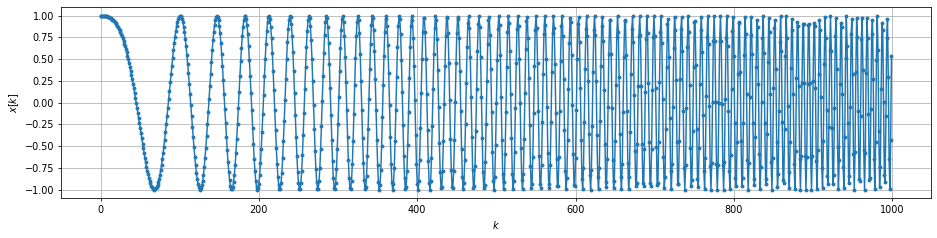

In [7]:
plt.figure(figsize=[13.5, 3.5], dpi=70)
plt.plot(np.arange(x.size), x, '.-')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

### STFT без перекрытия

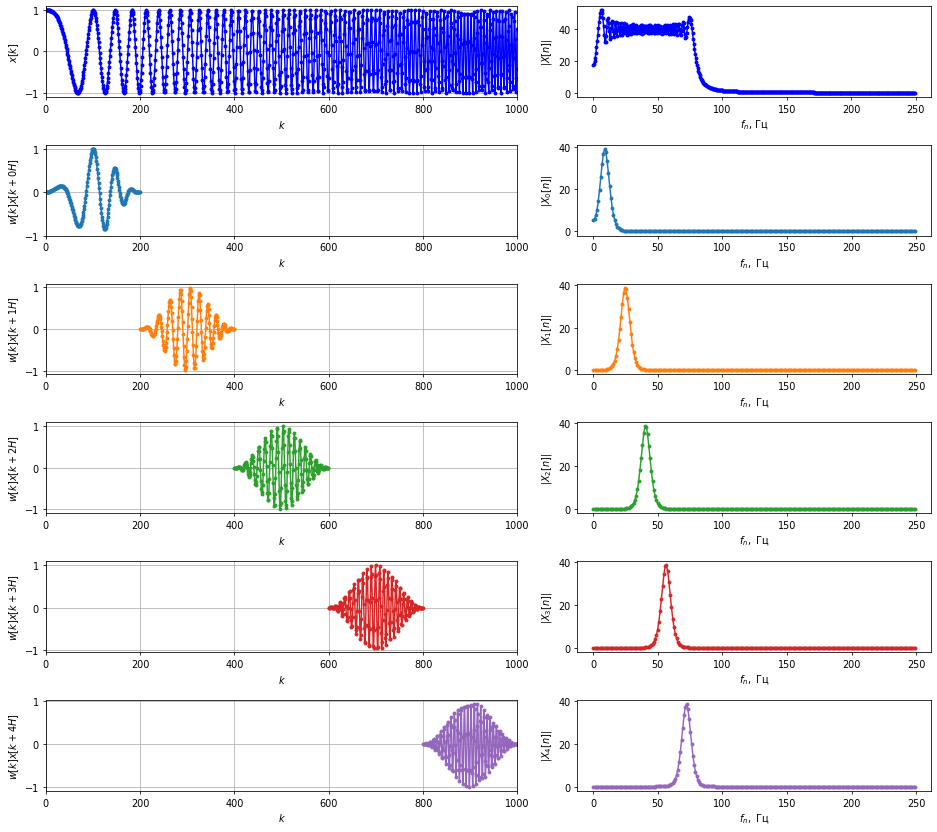

In [8]:
plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=200
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.hann(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

* `window=('boxcar')` Тип окна - прямоугольное.
* `nperseg=200` Размер окна (сегмента) $M=200$.
* `noverlap=0` Перекрытие $L=0$.
*` nfft=200` Размерность ДПФ $N_\text{FFT}=200$.

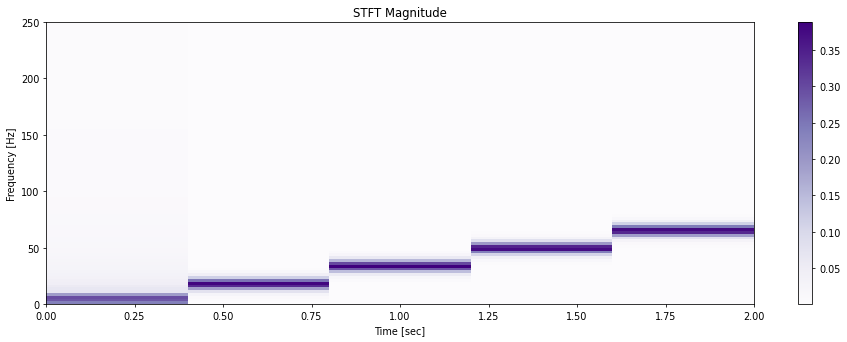

In [9]:
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=200, noverlap=0, nfft=200)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

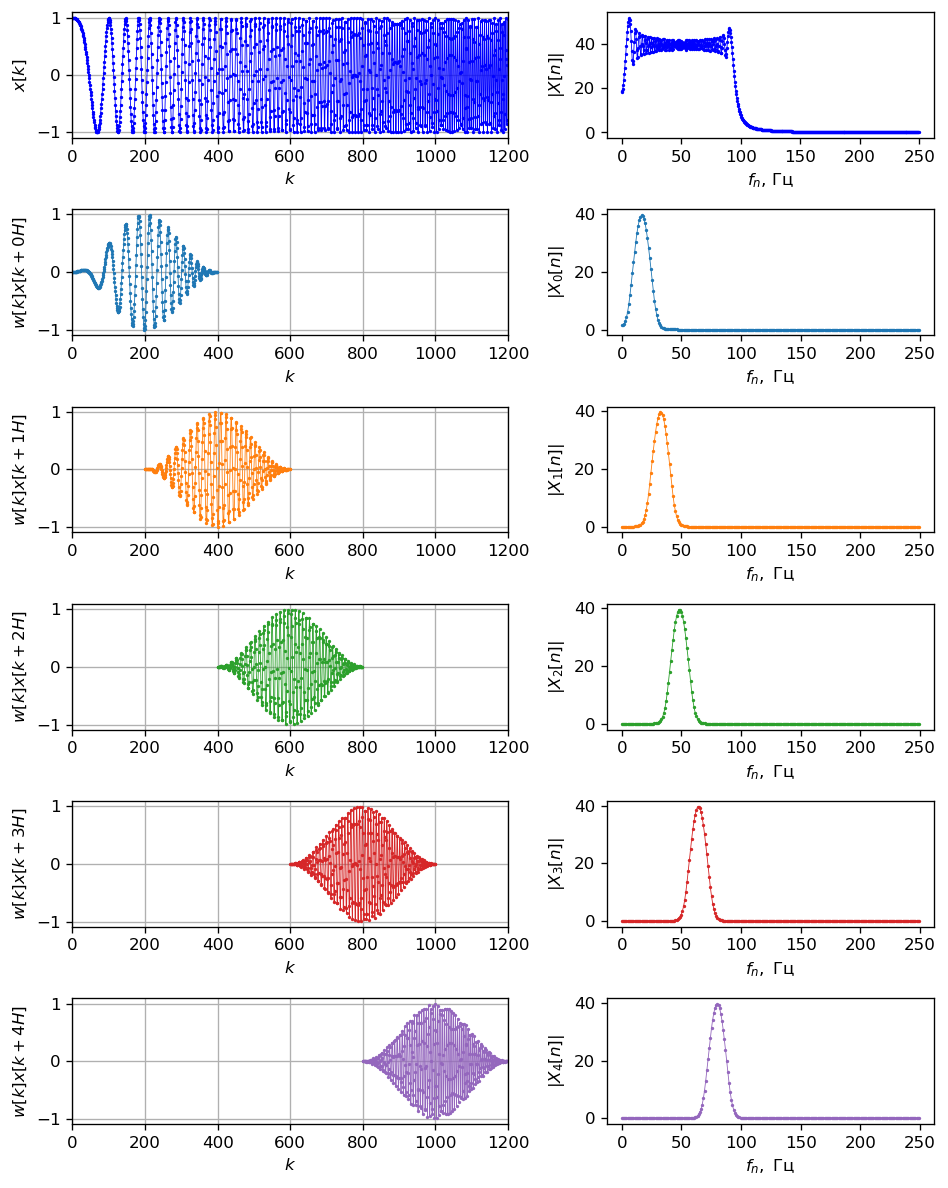

In [10]:
plt.figure(figsize=[8, 10], dpi=120)
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

nseg=5
nperseg=400
noverlap=200
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])
linewidth=0.5
ms=2
plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b', linewidth=0.5, ms=ms)
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', linewidth=linewidth, ms=ms)
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.hann(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u, linewidth=linewidth, ms=ms)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u, linewidth=linewidth, ms=ms)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

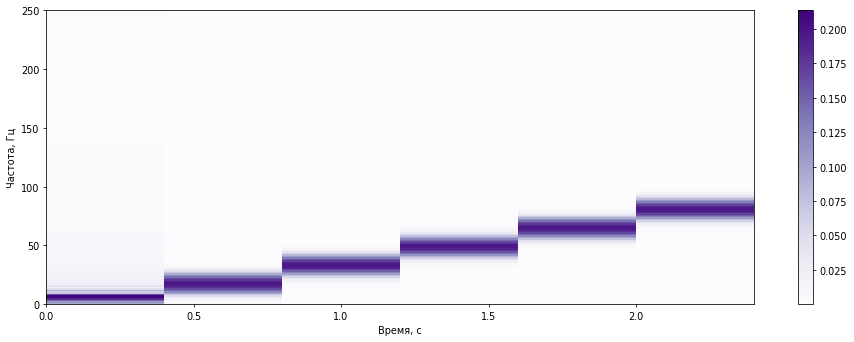

In [11]:
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=400, noverlap=200, nfft=400)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
#plt.ylim((20, 60))
plt.tight_layout()

### Функция scipy.signal.stft
`scipy.signal.stft(x, fs=1.0, window='hann', nperseg=256, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')` Расчет кратковременного дискретного преобразования Фурье (STFT)

**Основные параметры:**

`x` *array_like* Отсчеты сигнала. 

`fs` *float, optional* Частота дискретизации. 

`window` *str or tuple or array_like, optional* Используемое окно. Задается в виде параметров для функции `get_window` (без указания длины) или в виде массива отсчетов окна. По умолчанию генерируется окно Ханна. 

`nperseg` *int, optional* Длина сегмента $M$ (длина окна). По умолчанию 256.

`noverlap` *int, optional* Число точек в перекрытии $L$. По умолчанию, используется 50% перекрытие. 

`nfft` *int, optional* Размерность ДПФ сегментов.

Описание параметров `detrend`, `return_onesided`, `boundary`, `padded` , `axis`, `scaling: {‘spectrum’, ‘psd’}` можно найти в API reference SciPy. 

**Returns:**
`f` *ndarray* Массив частот спектрограммы.

`t` *ndarray* Массив времен спектрограммы.

`Zxx` *ndarray* Значения STFT.

## Разрешение STFT по времени и по частоте.

Разрешение по времени для STFT равно длине единичного сдвига окна в секундах, т.е. $R/{{f}_{\text{д}}}$. 

Разрешение по частоте обусловлено двумя параметрами.

* Сеткой частот ДПФ $\Delta f={{f}_{\text{д}}}/{{N}_{\text{FFT}}}$, где ${{N}_{\text{FFT}}}$— размерность ДПФ. Это разрешение можно улучшить без изменения длины кадра — путем добавления нулевых отсчетов. 

* Шириной главного лепестка оконной функции. Как правило, этот параметр зависит от длины окна $M.$



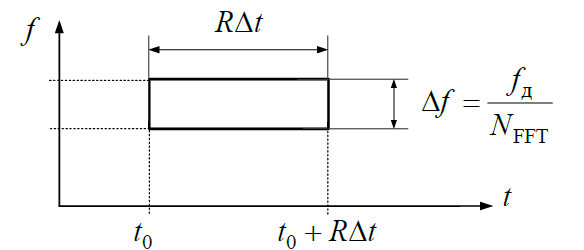

<IPython.core.display.Javascript object>


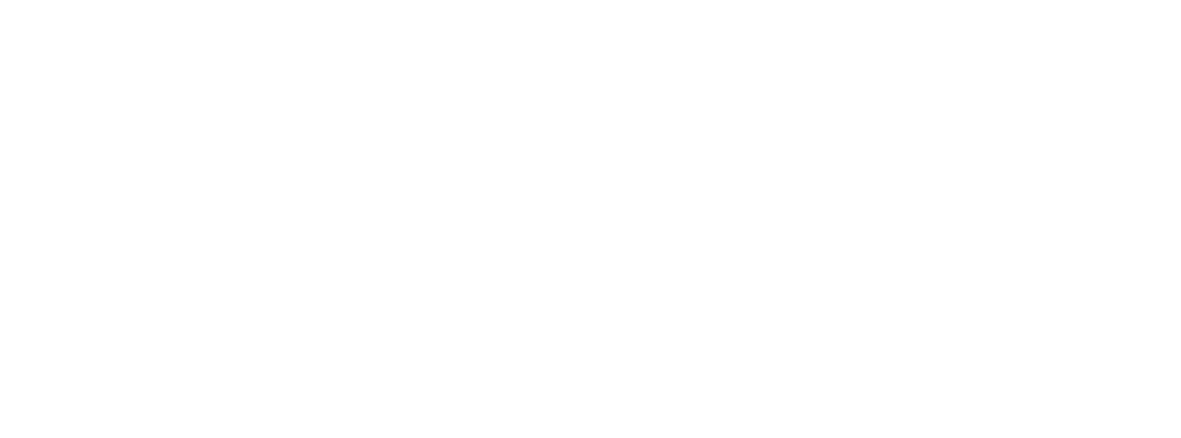

Единичный сдвиг окна в секундах 0.40
Растояние между отсчетами ДПФ вдоль оси частот  1.00 Гц


In [12]:
%matplotlib notebook
nperseg=400
noverlap=200
nfft=500
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
print("Единичный сдвиг окна в секундах %.2f" %((nperseg-noverlap)/fs))
print("Растояние между отсчетами ДПФ вдоль оси частот  %.2f Гц" %(fs/nfft))

In [13]:
%matplotlib inline

## Пример. Влияние параетров STFT на разрешение по времени и по частоте. 

In [14]:
fs, x = wavfile.read('vibraphone-scale.wav')
x=x[:, 1]
fs
print(x.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'vibraphone-scale.wav'

In [ ]:
x

In [ ]:
from IPython.display import Audio
Audio('./vibraphone-scale.wav')

Рассмотрим влияние длины окна $M$ на результат анализа.

$R=M-L$, где $M$ — длина окна, $L$ — число точек в перекрытии

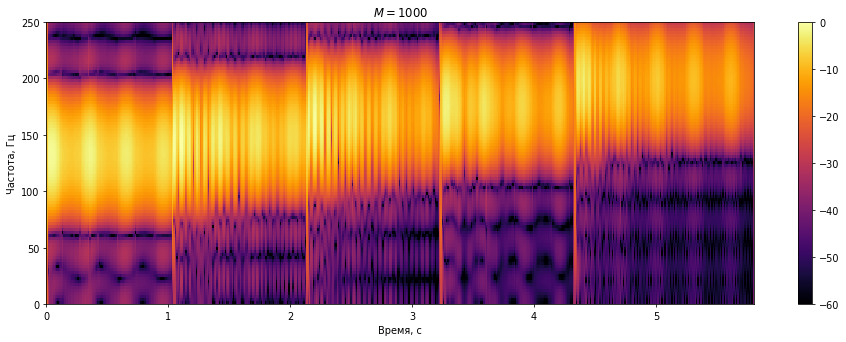

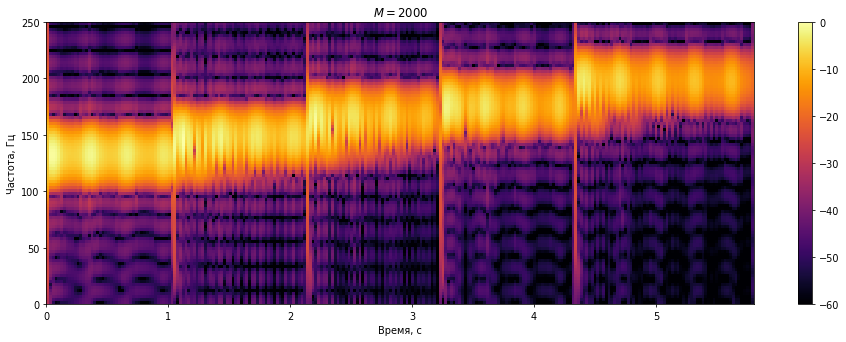

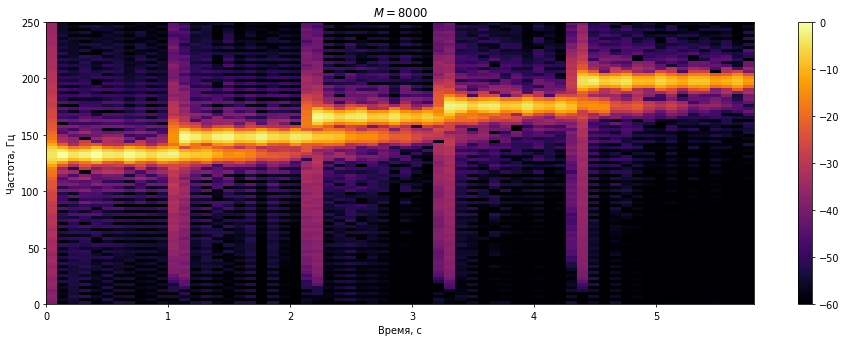

In [16]:
for nperseg in [1000, 2000, 8000]:
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=max(2**14, nperseg))
    plt.figure(figsize=[13.5, 5], num='R = %i' % (nperseg-noverlap), dpi=70)
    plt.title('$M = $%i' % nperseg)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

Теперь рассмотрим, как размерность ДПФ влияет на сетку частот. 

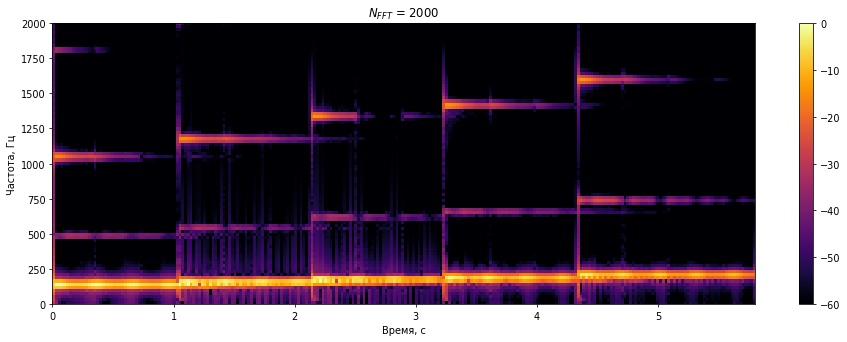

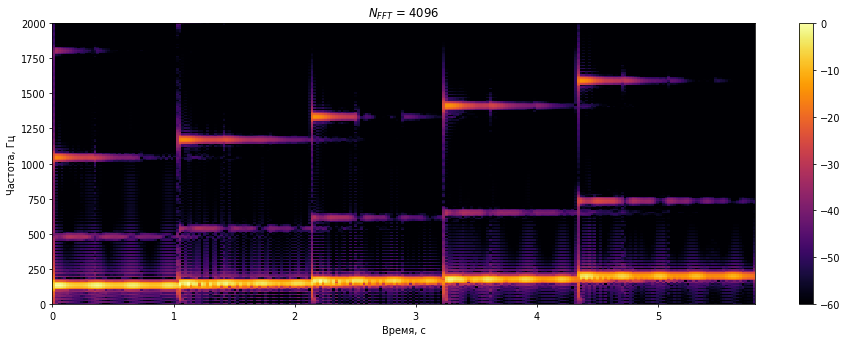

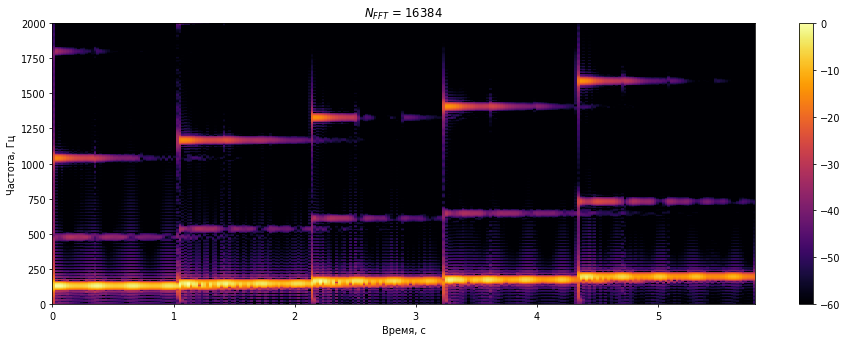

In [17]:
for nfft in [2000, 2**12, 2**14]:
    nperseg=2000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    plt.figure(figsize=[13.5, 5], num='nfft = %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 2000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

In [18]:
fs/4096

10.7666015625

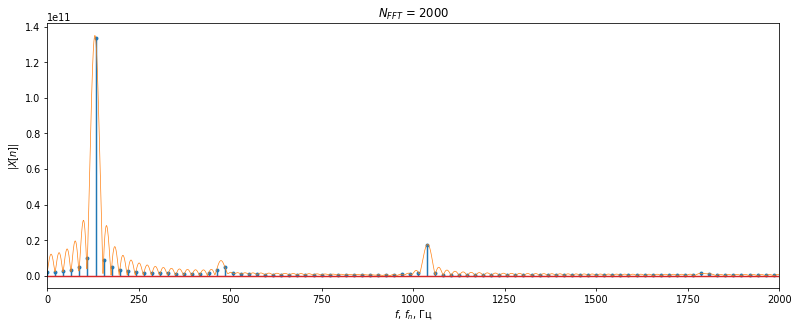

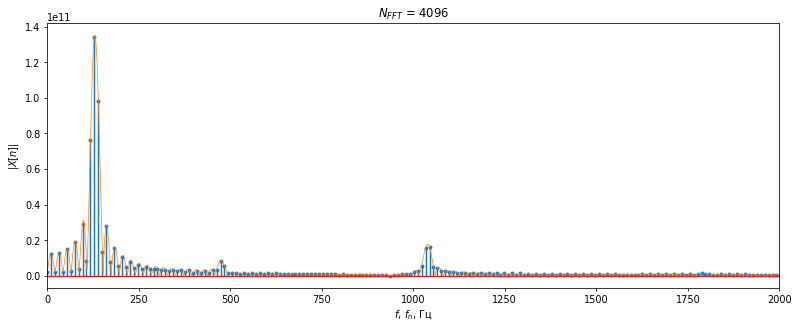

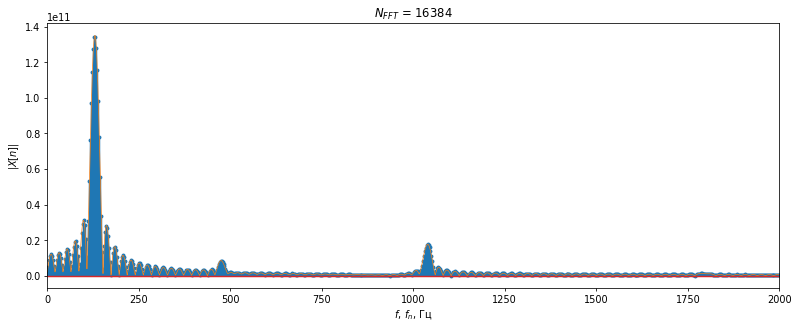

In [19]:
y=x[6000:8000]
for nfft in [2000, 2**12, 2**14]:
    plt.figure(figsize=[13.5, 5], num='nfft  =  %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.stem(fs*(np.arange(nfft)/nfft-0.5), abs(np.fft.fftshift(np.fft.fft(y, nfft))), linefmt='C0', markerfmt='C0.')
    nfft2=2**17
    plt.plot(fs*(np.arange(nfft2)/nfft2-0.5), abs(np.fft.fftshift(np.fft.fft(y, nfft2))), 'C1-', linewidth=0.7)
#     plt.plot(fs*np.arange(nfft2)/nfft2-0.5, abs(np.fft.fftshift(np.fft.fft(y, nfft2))), 'C0.-')
    plt.xlim([0, 2000])
    plt.xlabel('$f,\, f_n$, Гц')
    plt.ylabel('$|X[n]|$')
    plt.show()
#     plt.ylim([0, 2000])

В заключении рассмотрим, как выбор оконной функции влияет на результат анализа. 

In [20]:
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        количество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соответствующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

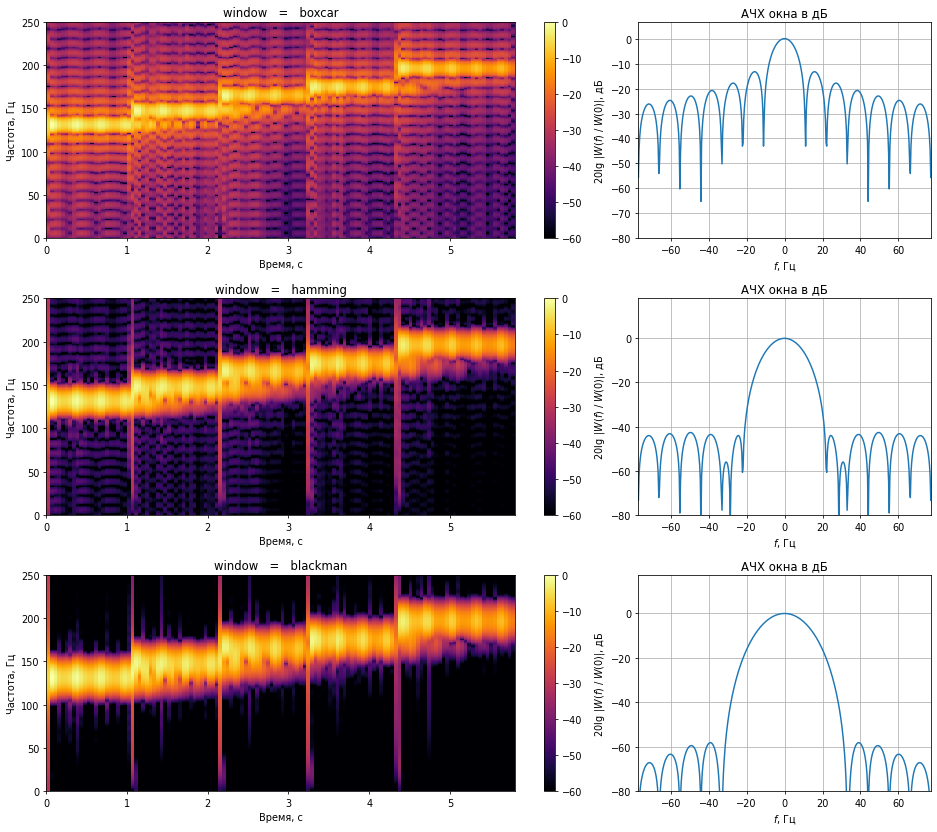

In [21]:
windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    
    nperseg=4000
#     noverlap=nperseg*2//3
    noverlap=nperseg//2


    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    with np.errstate(divide='ignore'):
        plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(np.abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    with np.errstate(divide='ignore'):
        plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1
    

##  Проверка условия COLA(R)

По опредлению, окно $w[k]$ обладает свойством COLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]=const \ \forall k\in \mathbf{Z}$.

In [22]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

In [23]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=1000)

False

Если выполнено COLA(R), то
$$X[n]=const \sum_{m=-\infty }^{\infty }{{X}_{m}}[n]$$.

Формула означает, что для каждого коэффициента $n$ сумма ДПФ по всем интервалам равна ДПФ всего сигнала. 
Если условие COLA(R) выполнено, то по известному STFT гарантировано можно найти исходную последовательность.


Примеры окон и $L$, для которых условие выполнено:
* прямоугольное окно с перекрытием $0,\ \frac{1}{2},\ \frac{2}{3},\ \frac{3}{4},\ldots $ от $M$;
* окно Бартлетта с перекрытием $\frac{1}{2},\ \frac{3}{4},\ \frac{5}{6},\ldots $ от $M$;
* окно Ханна с перекрытием $\frac{1}{2},\ \frac{2}{3},\ \frac{3}{4},\ldots $ от $M$;
* любое окно при $L=M-1$, т.е. COLA(R=1) для любого окна выполнено. 


##  Проверка условия NOLA(R)

По опредлению, окно $w[k]$ обладает свойством NOLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]^2 \neq 0\ \forall k\in \mathbf{Z}$.

Условие NOLA(R)  необходимо для обратимости STFT. 

In [24]:
signal.check_NOLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

In [25]:
signal.check_NOLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=1)

False

## Вычисление обратного преобразования

Вычисление обратного преобразования можно провести с помощью функции `scipy.signal.istft`.

In [26]:
t1, x1 =  signal.istft(Zxx, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
x1

array([ 35013.13571391, -34809.05080989,  34608.32212162, ...,
         -787.38864335,    782.20792438,   -777.02989886])

## Пример. vibraphone-loop-1.wav

In [27]:
fs, x = wavfile.read('vibraphone-loop-1.wav')
x=x[:, 1]
x

C:\Users\torma\AppData\Local\Temp/ipykernel_3008/737853191.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read('vibraphone-loop-1.wav')


array([        0,         0,         0, ..., -12255232, -14221312,
       -16056320])

In [28]:
from IPython.display import Audio
Audio('./vibraphone-loop-1.wav')

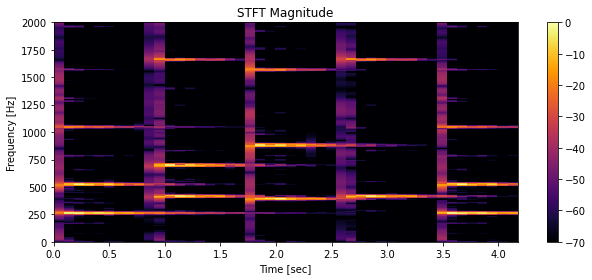

In [29]:
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=8000, noverlap=None, nfft=2**15)
plt.subplots(figsize=[9, 4])
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-70, cmap=plt.get_cmap('inferno'), shading='auto')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()

## Скользящее однобиновое ДПФ и STFT

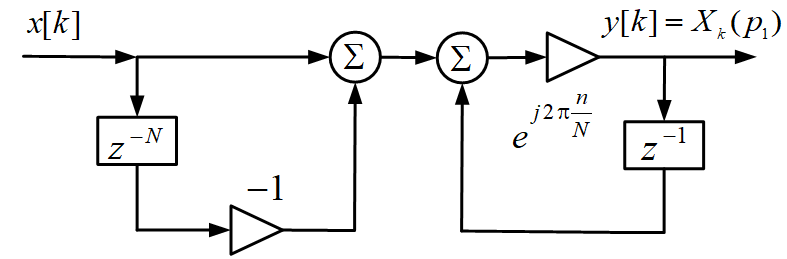

In [30]:
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

In [31]:
N=400
n=48
p=np.exp(2j*np.pi*n/N)
beta=np.zeros(N+1, dtype=complex)
beta[0] = 1
beta[N] = -1
alpha=np.zeros(N+1, dtype=complex)
alpha[0] = 1.0/p
alpha[1] = -1

y = signal.lfilter(beta, alpha, np.hstack([x, np.zeros(N)]))
print(abs(y[N-1]), y[N-1])

3.002077006187725 (0.5645156784138072-2.948523087904528j)


In [32]:
48/400*500

60.0

<Figure size 960x1200 with 0 Axes>

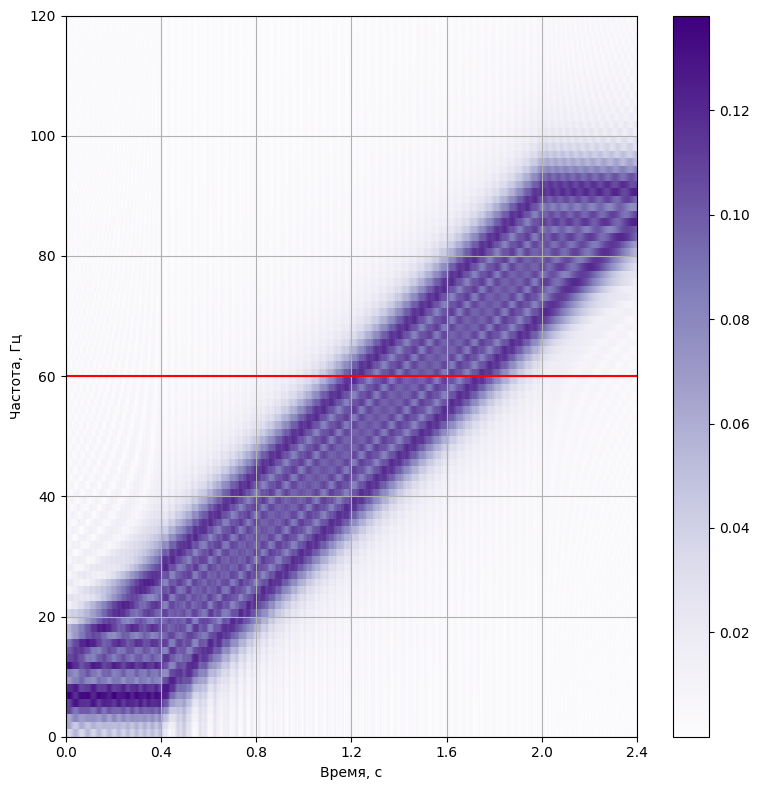

In [33]:
plt.figure(figsize=[8, 10], dpi=120)
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=400, noverlap=399, nfft=400)
plt.figure(figsize=[8, 8], dpi=100)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.ylim((0, 120))
plt.xticks(np.arange(0, 2.5, 0.4))
plt.tight_layout()
plt.plot([0, 2.4], [60, 60], 'r')
plt.grid()

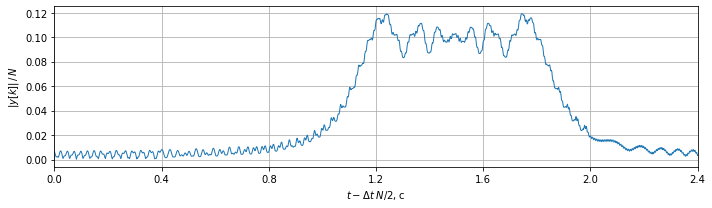

In [34]:
plt.figure(figsize=[10, 3])
linewidth=1
ms=2
plt.plot((np.arange(len(y))-200)/fs, abs(y/N), '-', linewidth=linewidth, ms=ms)
plt.xlim([0, 2.4])
plt.xticks(np.arange(0, 2.5, 0.4))
plt.xlabel('$t-\\Delta t\;N /2$, с')
plt.ylabel('$|y[k]|\,/\,N$')
#plt.yticks([0, 0])
plt.tight_layout()
plt.grid()
plt.show()

In [35]:
Zxx.shape

(201, 1201)

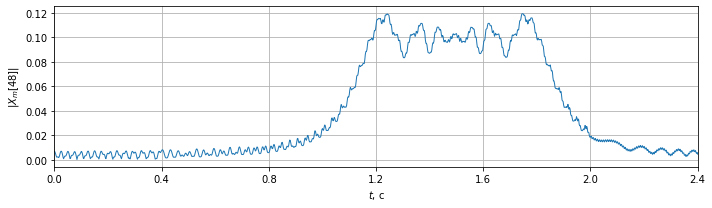

In [36]:
y1=abs(Zxx[n, :])
plt.figure(figsize=[10, 3])
linewidth=1
ms=2
plt.plot(np.arange(len(y1))/fs, abs(y1), '-', linewidth=linewidth, ms=ms)
plt.xlim([0, 2.4])
plt.xticks(np.arange(0, 2.5, 0.4))
plt.xlabel('$t$, c')
plt.ylabel('$|X_m[%i]|$' %n)
plt.tight_layout()
plt.grid()
plt.show()

# Список литературы
* Цифровая обработка сигналов / А. Оппенгейм, Р. Шафер ; пер. с англ. под ред. С. Ф. Боева .— 3-е изд., испр. — М. : Техносфера, 2019 .— 1048 с. 
* https://docs.scipy.org/doc/scipy/reference/signal.html
* MOOC: Digital Signal Processing - EPFL https://www.coursera.org/learn/dsp (доступ к видеоматериалам свободный - необходимо нажать "прослушать курс" без оформления подписки). 